In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder

In [4]:
class NeuralNetwork:

  def __init__(self, input_size, hidden_size, output_size):

    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size


    self.W1 = np.random.randn(self.input_size, self.hidden_size)
    self.b1 = np.zeros((1, self.hidden_size))
    self.W2 = np.random.randn(self.hidden_size, self.output_size)
    self.b2 = np.zeros((1, self.output_size))


  def sigmoid(self, x):

    return 1 / (1 + np.exp(-x))

  def sigmoid_derivative(self, x):

    return self.sigmoid(x) * (1 - self.sigmoid(x))


  def calculate_loss(self, y_true, y_pred):

      m = y_pred.shape[0]
      loss = -1/m * np.sum(y_true * np.log(y_pred + 1e-10))
      return loss

  # correct solution:
  def softmax(self, x):
    exp_vals = np.exp(x)
    sum_exp = np.sum(exp_vals, axis=-1, keepdims=True)
    softmax_output = exp_vals / sum_exp

    return softmax_output

  def forward(self, x):

    self.z1 = np.dot(x, self.W1) + self.b1
    self.a1 = self.sigmoid(self.z1)
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = self.softmax(self.z2)

    return self.a2

  def backward(self, x, y, learning_rate):

    m = x.shape[0]

    dz2 = self.a2 - y
    dW2 = (1 / m) * np.dot(self.a1.T, dz2)
    db2 = (1 / m) * np.sum(dz2, axis=0)
    dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.z1)
    dW1 = (1 / m) * np.dot(x.T, dz1)
    db1 = (1 / m) * np.sum(dz1, axis=0)



    self.W2 -= learning_rate * dW2
    self.b2 -= learning_rate * db2
    self.W1 -= learning_rate * dW1
    self.b1 -= learning_rate * db1



  def train(self, x, y, epochs, learning_rate):

    losslist = []

    for epoch in range(epochs):

      output = self.forward(x)
      self.backward(x, y, learning_rate)

      if epoch %100 == 0:
        loss = self.calculate_loss(y, output)
        losslist.append(loss)
        print("Epoch: ",epoch, ", Loss: ",loss)



    return losslist

  def predict(self,x):

    preds = self.forward(x)


    preds = np.argmax(preds, axis=1)

    return preds


In [5]:
def normalize(X):

    X = x/255.0

    return X


In [6]:
x, y = load_digits(return_X_y=True)


In [7]:
x.shape, y.shape


((1797, 64), (1797,))

In [8]:
x = normalize(x)
y = y.reshape(-1,1)

In [9]:
enc = OneHotEncoder(handle_unknown='ignore')
y = enc.fit_transform(y).toarray()


In [10]:
x.shape, y.shape


((1797, 64), (1797, 10))

(<matplotlib.image.AxesImage at 0x7a288e4a1b10>,
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

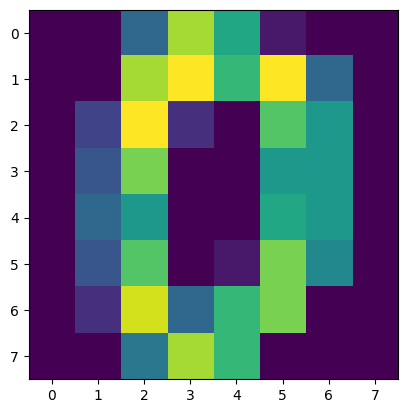

In [11]:
plt.imshow(x[0].reshape(8,8)), y[0]


In [15]:
nn = NeuralNetwork(input_size=64, hidden_size=5, output_size=10)


In [20]:
li = nn.train(x, y, epochs=50000, learning_rate=0.01)


Epoch:  0 , Loss:  2.2844091539644116
Epoch:  100 , Loss:  2.284031081512863
Epoch:  200 , Loss:  2.2836526077415154
Epoch:  300 , Loss:  2.283273721404885
Epoch:  400 , Loss:  2.2828944112667227
Epoch:  500 , Loss:  2.282514666098594
Epoch:  600 , Loss:  2.2821344746789003
Epoch:  700 , Loss:  2.281753825792216
Epoch:  800 , Loss:  2.2813727082288406
Epoch:  900 , Loss:  2.2809911107845027
Epoch:  1000 , Loss:  2.2806090222601627
Epoch:  1100 , Loss:  2.280226431461892
Epoch:  1200 , Loss:  2.2798433272007985
Epoch:  1300 , Loss:  2.2794596982929956
Epoch:  1400 , Loss:  2.279075533559585
Epoch:  1500 , Loss:  2.2786908218266677
Epoch:  1600 , Loss:  2.278305551925359
Epoch:  1700 , Loss:  2.2779197126918223
Epoch:  1800 , Loss:  2.2775332929673002
Epoch:  1900 , Loss:  2.2771462815981542
Epoch:  2000 , Loss:  2.27675866743591
Epoch:  2100 , Loss:  2.2763704393373017
Epoch:  2200 , Loss:  2.275981586164318
Epoch:  2300 , Loss:  2.2755920967842522
Epoch:  2400 , Loss:  2.27520196006975

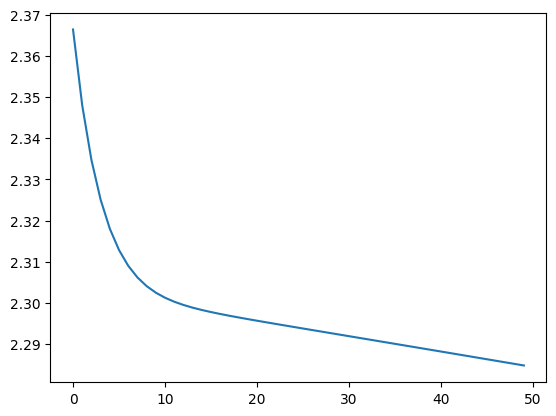

In [19]:
plt.plot(li)
